In [ ]:
# Purpose of L1 or L2 Regularization
# Regularization will tend to reduce overfitting in a model. It will tend to reduce the model’s performance on the training set, but ultimately
# improve performance on testing sets.
# One way to think about regularization is as a tool to introduce additional information (bias) to penalize extreme parameter (weight)
# values. There are two common types of regularization we will cover in this course: L1 and L2. They both introduce a penalty term to the
# weights (coefficients) that the model uses to make predictions. The larger the weights, the greater the penalty. If model performance is
# your primary concern, it is best to try both!
# When to use L1?
# L1 regularization introduces a penalty that will push some or many weights to zero. Reducing feature weights to zero is useful in cases
# where you have a large number of features.
# When should you use L2?
# L2 can work particularly well if there is a high degree of multicollinearity in your model (high correlation between features), filtering out
# noise from data, and preventing overfitting (L1 can also help with overfitting).

In [2]:
# Import the Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [6]:
# Load the data
df = pd.read_csv('C:/Users/User/Desktop/cancer.csv')

# The code below shows a default logistic regression model. 
# Note that the default model uses solver = 'lbfgs' with L2 regularization, and a C value of 1.0.
X = df.drop(columns=['diagnosis', 'id'])

y = df['diagnosis']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# Make an instance of the model with default parameters
logreg = LogisticRegression()
# Instantiate Standard Scaler because scaling is required for logistic regression
scaler = StandardScaler()
# Put scaler and model in a pipeline
logreg_pipe = make_pipeline(scaler, logreg)
# Training the model on the data, storing the information learned from the data
# Model is learning the relationship between X and y
logreg_pipe.fit(X_train, y_train)
print(logreg_pipe.score(X_train, y_train))
print(logreg_pipe.score(X_test, y_test))

# Those results are pretty good, but let's see if we can improve the test score by changing the value of C.
# Generally when we change the values of C we change them by orders of magnitude. The difference between .1 and .2 won’t be great,
# but the difference between .1 and 1 or 1 and 10 will be greater.

0.9859154929577465
0.9790209790209791


{0.0001: 0.6223776223776224,
 0.001: 0.6223776223776224,
 0.01: 0.951048951048951,
 0.1: 0.972027972027972,
 1: 0.972027972027972,
 10: 0.9440559440559441,
 100: 0.9370629370629371,
 1000: 0.9370629370629371}

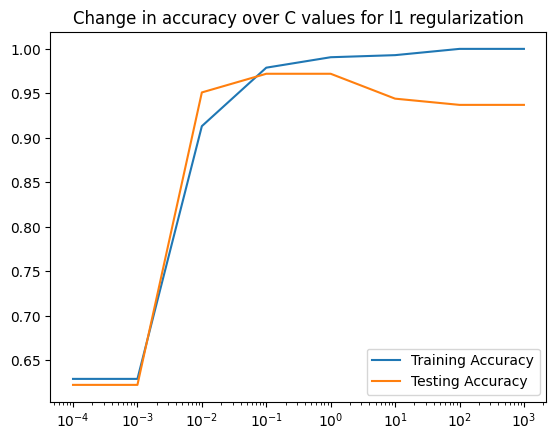

In [8]:
# L1 Tuning:
# First let’s try L1 regularization. The default solver can’t do L1 regularization, so we need to change the solver in the logistic regression
# model. We will use solver = 'liblinear'.

# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
#iterative over the c values
for c in c_values:

    # instantiate a model with each value of c and fit it on the data
    log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l1')
    log_reg_pipe = make_pipeline(scaler, log_reg)
    log_reg_pipe.fit(X_train, y_train)

    # add the training and testing scores to our scores lists
    train_scores.append(log_reg_pipe.score(X_train, y_train))
    test_scores.append(log_reg_pipe.score(X_test, y_test))

#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l1 regularization')
ax.legend()

#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}


# Remember that our ultimate goal is to improve accuracy on the test set!
# According to this graph we get the best accuracy on the test set when C=0.1 (10^-1). Notice that as we increase the value of C, the
# score on the training data continues to increase. This is because less regularization tends to decrease bias. However, after a certain
# point, less regularization (higher C value) reduces the accuracy on the test data as the model gets too overfit. More regularization (a
# smaller C) tends to reduce variance while increasing bias.

{0.0001: 0.951048951048951,
 0.001: 0.951048951048951,
 0.01: 0.9790209790209791,
 0.1: 0.993006993006993,
 1: 0.9790209790209791,
 10: 0.972027972027972,
 100: 0.951048951048951,
 1000: 0.9370629370629371}

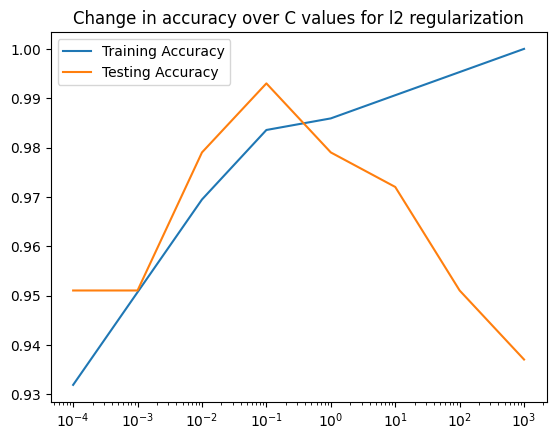

In [9]:
# L2 Tuning
# We will change the code slightly to use L2 regularization.

# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
#iterative over the c values
for c in c_values:
    # instantiate a model with each value of c and fit it on the data
    log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l2')
    log_reg_pipe = make_pipeline(scaler, log_reg)
    log_reg_pipe.fit(X_train, y_train)

    # add the training and testing scores to our scores lists
    train_scores.append(log_reg_pipe.score(X_train, y_train))
    test_scores.append(log_reg_pipe.score(X_test, y_test))

#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l2 regularization')
ax.legend()
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}



# With L2 regularization we get our best score at C=0.1, and test scores drop off much more dramatically as C increases.
# With an accuracy of 99.3%, our best hyperparameter settings for our logistic regression model would be solver=’liblinear’, penalty=’l2’,
# and C=0.1. If we look at our feature correlations, it makes sense that L2 would be the better choice because many of our features are
# highly correlated. The heatmap below shows highly correlated features as either very light or very dark squares at the intersections of
# those features’ rows and columns. We see many light and many dark squares. As we know, L2 regularization is particularly helpful in
# modeling datasets with multicollinearity, or highly correlated features.

In [ ]:
# Logistic Regression can use either L1 or L2 regularization, though some solvers can only use certain kinds. We can adjust the strength
# of the regularization term by tuning C. Higher values of C are weaker regularization and lower numbers are stronger.
# Finding the optimal amount of regularization for your models to balance the bias and the variance is a crucial step in model
# development.